In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy import stats
from sklearn.preprocessing import StandardScaler
# silhouette metrics took too long on dataset
# from sklearn.metrics import silhouette_score
# for KMeans model
from sklearn.cluster import KMeans
# for DBSCAN model
from sklearn.cluster import DBSCAN
# for birch model
from sklearn.cluster import Birch

In [2]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("spotify_tracks.csv")

In [3]:
tracks_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [4]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
# Select only necessary features for clustering
tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]

In [7]:
# columns to check for outliers
columns_to_check = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
# calculate z scores
z_scores = stats.zscore(tracks[columns_to_check])
# print z scores
print(z_scores)

        acousticness  danceability    energy  instrumentalness  liveness  \
0          -0.850202      0.629244 -0.717148         -0.504109  0.758743   
1           1.831732     -0.845908 -1.889980         -0.504094 -0.591211   
2          -0.315499     -0.742186 -1.122669         -0.504112 -0.507167   
3           1.774593     -1.733304 -2.312994         -0.503883 -0.428376   
4           0.463399      0.295030 -0.788711         -0.504112 -0.686285   
...              ...           ...       ...               ...       ...   
113995      0.977652     -2.274962 -1.615656          2.493755 -0.668426   
113996      2.042245     -2.263437 -2.084789          2.648817 -0.570200   
113997      1.660315      0.358416 -1.241940         -0.504112 -0.681033   
113998      0.198754      0.116398 -0.538241         -0.504112  0.296502   
113999      1.100952     -0.235103 -0.613780         -0.504112 -0.652668   

        speechiness   valence  
0          0.551848  0.929306  
1         -0.078993 -0.

In [8]:
# checks if a z score for any column in a row is above 4
# .any ensures that only 1 column has to be above 4 (or below -4) to be an outlier, not every column
# with 3 standard deviations, 4.73% of data are outliers. This seemed too high, so I'm using 4 standard deviations
outliers = ((z_scores > 4) | (z_scores < -4)).any(axis=1)
# makes a dataframe of non-outliers
non_outliers = tracks_df[~outliers]
# prints % of data that are outliers
print(f'{100 - (len(non_outliers) / len(tracks) * 100)}% of data are outliers')

1.2587719298245617% of data are outliers


In [9]:
# normalize data (helpful for all models)
scaler = StandardScaler()
tracks = scaler.fit_transform(tracks)

In [10]:
# using the elbow method to test optimal number of clusters
# the elbow point tests where the value starts to level off, about 15
# silhouette method took too long so only used the elbow method
# if you don't want to run it again, here are the results:
# 5 clusters with value of 423432.3 (elbow)
# 10 clusters with value of 267103.8 (elbow)
# 15 clusters with value of 221535.1 (elbow)
# 20 clusters with value of 195752.4 (elbow)
# 25 clusters with value of 177833.0 (elbow)
# 30 clusters with value of 165197.3 (elbow)
# 35 clusters with value of 154795.6 (elbow)
# 40 clusters with value of 146217.4 (elbow)

for cluster_count in range(5, 45, 5):
    kmeans = KMeans(n_clusters=cluster_count)
    kmeans.fit(tracks)
    print(f'{cluster_count} clusters with value of {kmeans.inertia_} (elbow method)')
    
    # silhouette score took too long for the dataset
    # silhouette_average = approximate_silhouette_score(data, kmeans.labels_)
    # print(f'{cluster_count} clusters with value of {silhouette_average} (silhouette method)')

/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 clusters with value of 422105.51050806517 (elbow method)


/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 clusters with value of 267102.63219914644 (elbow method)


/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15 clusters with value of 222189.11266974447 (elbow method)


/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


20 clusters with value of 195592.97332813317 (elbow method)


/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


25 clusters with value of 178135.6544082145 (elbow method)


/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


30 clusters with value of 165535.1176500906 (elbow method)


/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


35 clusters with value of 155064.1706907615 (elbow method)


/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


40 clusters with value of 146473.07567568086 (elbow method)


In [11]:
# 5 clusters = original
# 15 clusters = elbow test
num_clusters = 15

# NOTE: Pick 1 of the 3 models below (KMeans, DBSCAN, Birch), comment out the rest

In [12]:
#'''
# KMeans model
kmeans = KMeans(n_clusters=num_clusters)
# Train the model with our data
kmeans.fit(tracks)
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = kmeans.labels_
#'''

/Users/benjaminmelitz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
'''
# DBSCAN model
# dbscan fit data
# eps and min_samples control what data points are considered clusters
# eps = radius to be in cluster, min samples = minimum data points to be in cluster
# eps=0.7, min_samples=100 gets 5 clusters, original number of clusters
# eps=0.45, min_samples=50 gets 15 clusters, number of clusters from elbow test
if num_clusters == 5:
    dbscan = DBSCAN(eps=0.7, min_samples=100)
elif num_clusters == 15:
    dbscan = DBSCAN(eps=0.45, min_samples=50)
else:
    exit('Unknown cluster amount')
dbscan.fit(tracks)
# add 'type' column of DBSCAN labels
cluster_labels = dbscan.labels_
tracks_df['type'] = cluster_labels
print(f'{len(np.unique(cluster_labels)) - 1} clusters')
'''

"\n# DBSCAN model\n# dbscan fit data\n# eps and min_samples control what data points are considered clusters\n# eps = radius to be in cluster, min samples = minimum data points to be in cluster\n# eps=0.7, min_samples=100 gets 5 clusters, original number of clusters\n# eps=0.45, min_samples=50 gets 15 clusters, number of clusters from elbow test\nif num_clusters == 5:\n    dbscan = DBSCAN(eps=0.7, min_samples=100)\nelse:\n    dbscan = DBSCAN(eps=0.45, min_samples=50)\ndbscan.fit(tracks)\n# add 'type' column of DBSCAN labels\ncluster_labels = dbscan.labels_\ntracks_df['type'] = cluster_labels\nprint(f'{len(np.unique(cluster_labels)) - 1} clusters')\n"

In [14]:
# Agglomerative clustering model
# doesn't work for me, takes too long
'''
# fit data into model
agglo_types = AgglomerativeClustering(n_clusters=num_clusters).fit(tracks)
# add 'type' column of Agglomerative clustering labels
tracks_df['type'] = agglo_types.labels_
'''

"\n# fit data into model\nagglo_types = AgglomerativeClustering(n_clusters=num_clusters).fit(tracks)\n# add 'type' column of Agglomerative clustering labels\ntracks_df['type'] = agglo_types.labels_\n"

In [15]:
'''
# Birch model
birch_types = Birch(threshold=0.5, n_clusters=num_clusters).fit(tracks)
cluster_labels = birch_types.predict(tracks)
# add 'type' column of birch labels
tracks_df['type'] = cluster_labels
'''

"\n# Birch model\nbirch_types = Birch(threshold=0.5, n_clusters=num_clusters).fit(tracks)\ncluster_labels = birch_types.predict(tracks)\n# add 'type' column of birch labels\ntracks_df['type'] = cluster_labels\n"

In [16]:
# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

In [17]:
tracks.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,11
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,5
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,13
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,5
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


In [18]:
# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')
favorites = []
# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['track_id'].isin(ids)]

# the track_id provided in the module caused a key error, so I took one from the csv file

Enter comma-separated ids of your favorite songs
> 5SuOikwiRyPMVoIQDJUgSV,4qPNDBW1i3p13qLCt0Ki3A,1iJBSr7s7jYXzM8EGcbK5b,6lfxq3CG4xtTiEg7opyCyx


In [19]:
# This method gives recommendations for the most common cluster

# Find out the most frequent cluster among the user's favorite songs
# clusters = favorites['type'].value_counts()
# user_favorite_cluster = clusters.idxmax()

# print('\nFavorite cluster:', user_favorite_cluster, '\n')

# Get the songs that belong to the user's favorite cluster
# suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
# print(suggestions.head())

In [20]:
# This method gives recommendations for every cluster of songs

# cluster dict has key = cluster and value = set of song ids (no duplicates)
clusters = defaultdict(set)
for i, song in favorites.iterrows():
    clusters[song['type']].add(song['track_id'])

for cluster in list(clusters.items()):
    suggestions = tracks[tracks['type'] == cluster[0]]
    print(f'suggestion for song with track_id/s ', end='')
    for song_id in cluster[1]:
        print(song_id, end=' ')
    print('')
    print(suggestions.head())
    print('\n\n\n')

suggestion for song with track_id/s 5SuOikwiRyPMVoIQDJUgSV 
     Unnamed: 0                track_id      artists  \
0             0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino   
24           24  3Hn3LfhrQOaKihdCibJsTs   Jason Mraz   
98           98  7DYsBLdOqz0z14tYWMt2Tn  KT Tunstall   
133         133  1Qo3taHLFSQpzLm5Sty7M4   Jason Mraz   
146         146  4MihgVRpD82EZoT61GW63w   Jason Mraz   

                                           album_name        track_name  \
0                                              Comedy            Comedy   
24                       Human - Best Adult Pop Tunes          Unlonely   
98                                  Del gusto de mamá           Hold On   
133  Waiting for My Rocket to Come (Expanded Edition)     Sleep All Day   
146  Waiting for My Rocket to Come (Expanded Edition)  Curbside Prophet   

     popularity  duration_ms  explicit  danceability  energy  ...  mode  \
0            73       230666     False         0.676   0.461  ...     0   
24

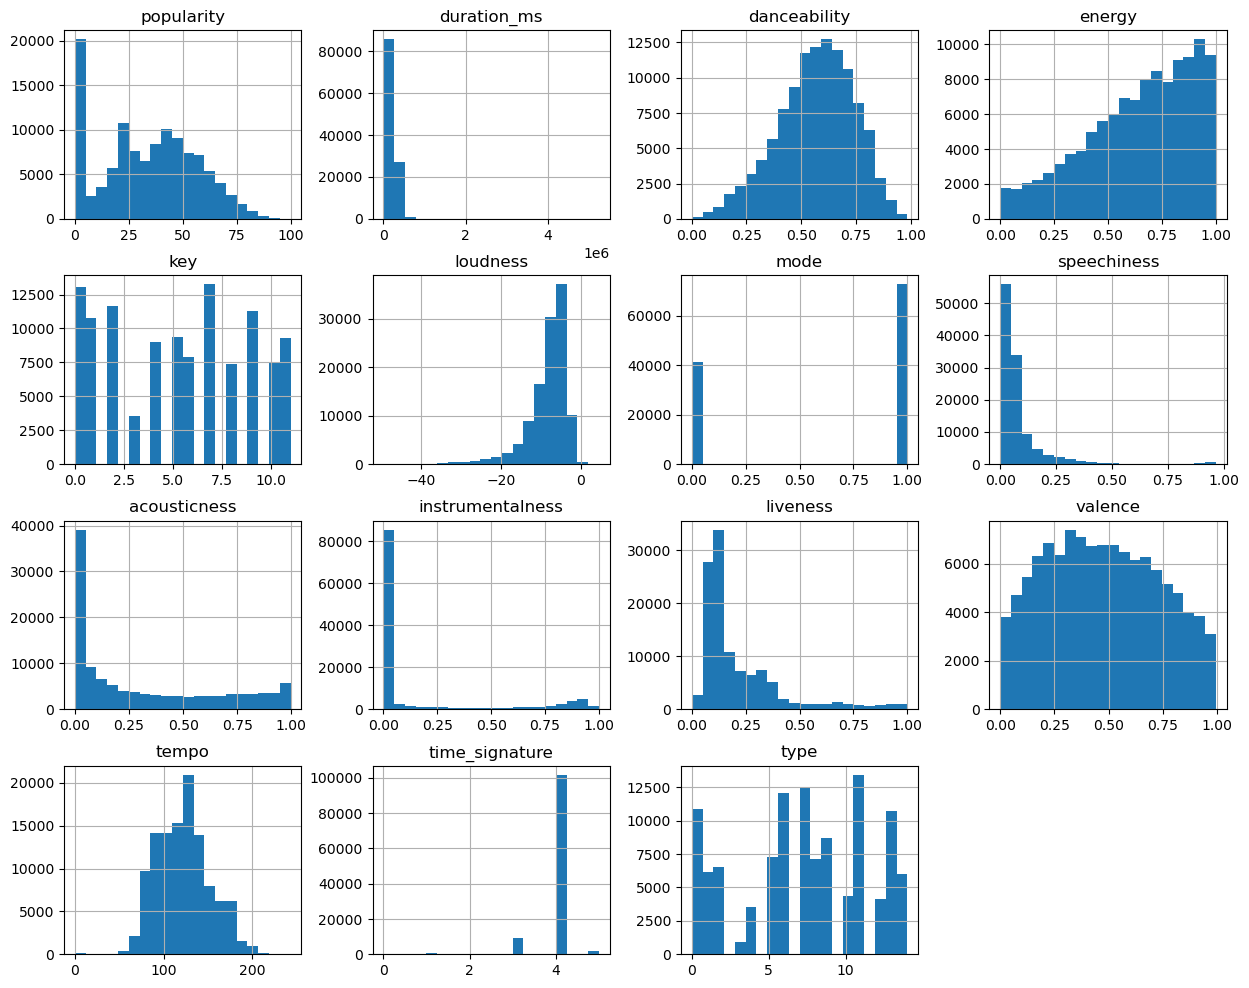

In [21]:
# drop unnamed column so it does not get graphed
tracks.drop(columns='Unnamed: 0', inplace=True)
tracks.hist(bins=20, figsize=(15,12))
plt.show()

/var/folders/yg/hqwyhkcd4858wym92g2j7mtm0000gn/T/ipykernel_63341/3323872508.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tracks.corr()


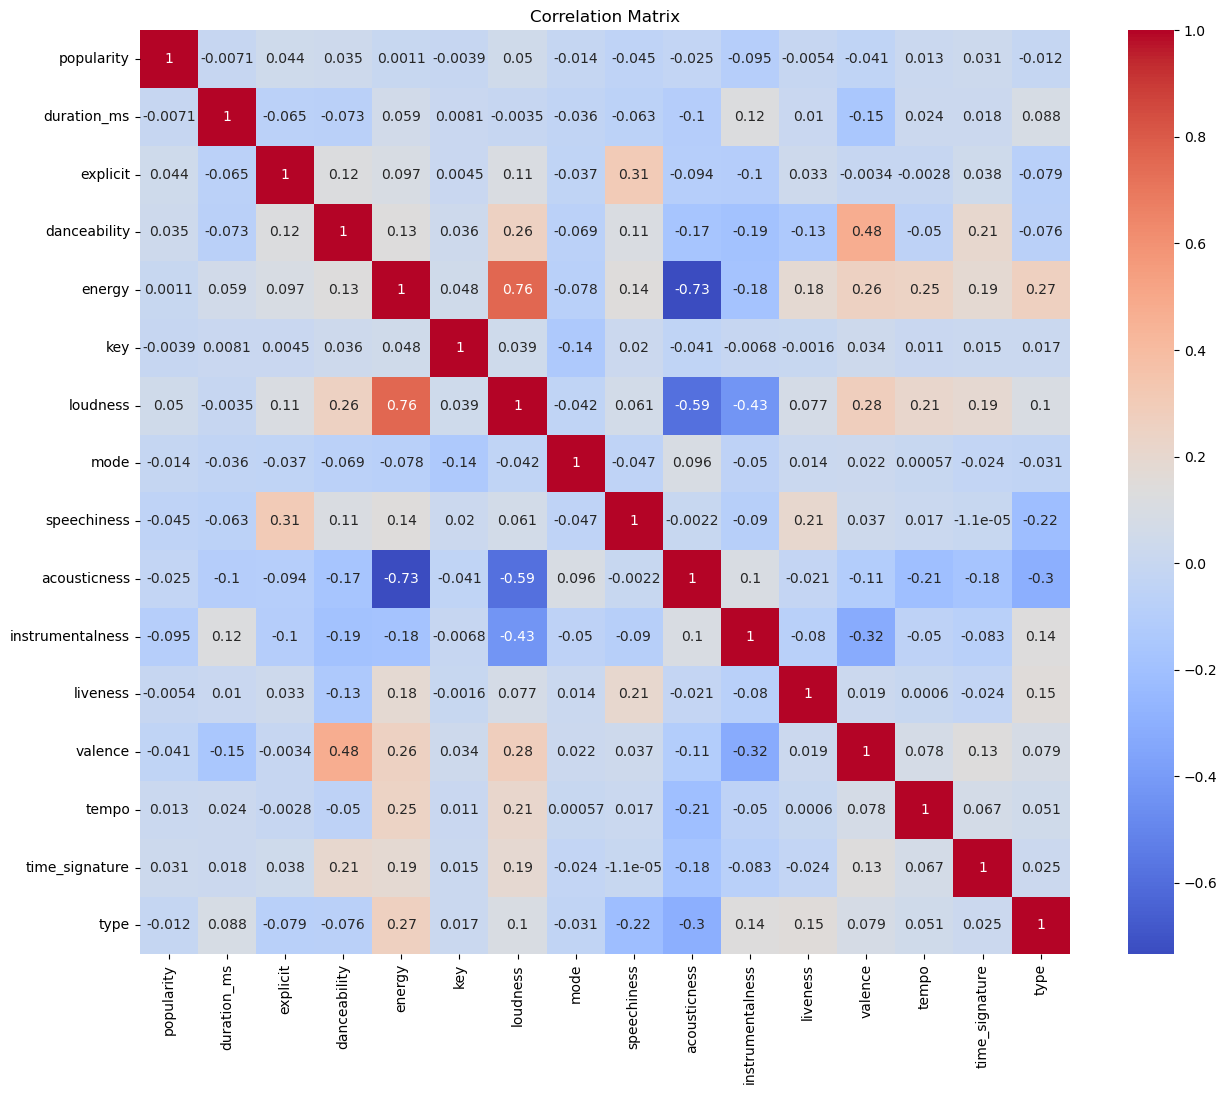

In [22]:
# calculate correlation
corr_matrix = tracks.corr()
plt.figure(figsize=(15,12))
# make heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

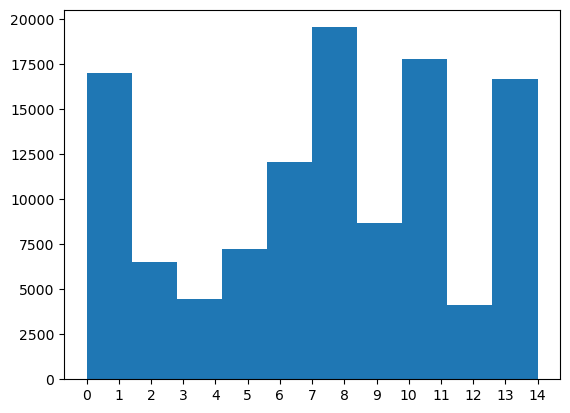

In [23]:
# displaying distribution of types for model comparison
plt.hist(tracks['type'])
# 5 clusters = original
# 15 clusters = elbow test
plt.xticks(range(num_clusters))
plt.show()

In [24]:
# user feedback
while True:
    # ask if user has feedback
    user_has_feedback = input('Any feedback? (y/n)\n').lower()
    # if acceptable answer, break out of forever loop
    if user_has_feedback in ('yes', 'y', 'no', 'n'):
        break
    # if unacceptable answer, tell user that input was invalid, repeat input until valid answer
    print('Invalid answer. Answer yes/no')

# if user has feedback, collect and store feedback in text file
if user_has_feedback in ('yes', 'y'):
    feedback = input('Enter feedback:\n')
    # opens feedback.txt file (creates file if one is not already created)
    with open('feedback.txt', 'a') as file:
        # write feedback in file
        file.write(feedback)
        file.write('\n')
    print('Thank you for your feedback!')

Any feedback? (y/n)
y
Enter feedback:
Amazing program, whoever designed it is a genius!
Thank you for your feedback!
